# Data Quality Assurance

This is an important step of the analysis. Here we will check that our observations are not duplicated and that there is no crucial data missing. Checking for inconsistencies and errors is important in order to lead us to the correct conclusions with as much of the original data as possible.

In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6,6)

In [3]:
wine = pd.read_csv("data/wine.1.initial_process.csv")

In [4]:
wine.head()

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.shape

(1599, 13)

### First check for duplicates

In [6]:
wine[wine.duplicated()].shape

(0, 13)

No duplicates! The **id** column prevents repeated observations as far as we know.

Next look at cardinality, or repeated values. We do not have any categorical variables so this is unlikely.

In [7]:
n_records = len(wine)
def duplicate_values_col(df):
    for column in df:
        column_counts = df[column].value_counts()
        most_common = column_counts.iloc[0]
        least_common = column_counts.iloc[-1]
        print("{}({}) | COMMON: {:.2f}%| UNCOMMON:{} observation/s".format(
            df[column].name,
            df[column].dtype,
            100 * most_common / (1.0 * n_records),
            least_common,
        ))

duplicate_values_col(wine)

id(int64) | COMMON: 0.06%| UNCOMMON:1 observation/s
fixed_acidity(float64) | COMMON: 4.19%| UNCOMMON:1 observation/s
volatile_acidity(float64) | COMMON: 2.94%| UNCOMMON:1 observation/s
citric_acid(float64) | COMMON: 8.26%| UNCOMMON:1 observation/s
residual_sugar(float64) | COMMON: 9.76%| UNCOMMON:1 observation/s
chlorides(float64) | COMMON: 4.13%| UNCOMMON:1 observation/s
free_sulfur_dioxide(float64) | COMMON: 8.63%| UNCOMMON:1 observation/s
total_sulfur_dioxide(float64) | COMMON: 2.69%| UNCOMMON:1 observation/s
density(float64) | COMMON: 2.25%| UNCOMMON:1 observation/s
pH(float64) | COMMON: 3.56%| UNCOMMON:1 observation/s
sulfates(float64) | COMMON: 4.32%| UNCOMMON:1 observation/s
alcohol(float64) | COMMON: 8.69%| UNCOMMON:1 observation/s
quality(int64) | COMMON: 42.59%| UNCOMMON:10 observation/s


Quality would be the only variable with low cardinality. Even at 43% there is not much of a cardinality issue, but we will consider it in this case relative to the other variables.

In [8]:
wine.quality.value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

Most of the entries are placed at a 5 or 6 on the quality scale.

### Are all these columns useful?

Some of the columns may have a direct relationship and are measuring the same thing. The variables I want to explore with these relationships are fixed acidity, volatile acidity, and citric acid, as well as free vs total sulfur dioxide.

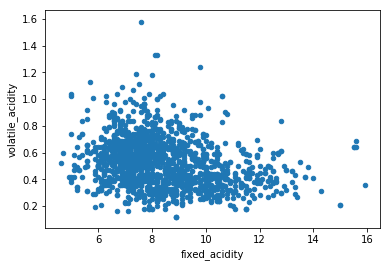

In [9]:
wine.plot.scatter(x="fixed_acidity",y="volatile_acidity");

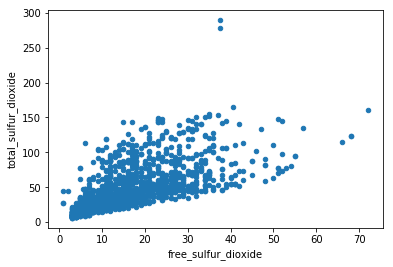

In [10]:
wine.plot.scatter(x="free_sulfur_dioxide",y="total_sulfur_dioxide");

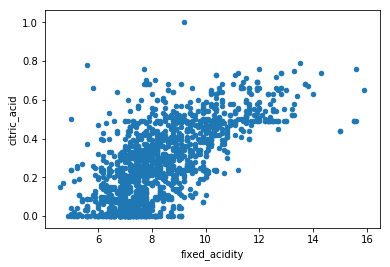

In [11]:
wine.plot.scatter(x="fixed_acidity",y="citric_acid");

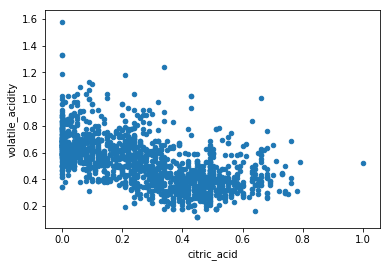

In [12]:
wine.plot.scatter(x="citric_acid",y="volatile_acidity");

### Conclusions
* Fixed acidity and volatile acidity do not have a relationship, but fixed acidity and citric acid have a direct relationship. Citric acid and volatile_acidity have an inverse relationship.
* Free sulfur dioxide and total sulfur dioxide have a direct relationship.

**Next we will remove the columns that we do not think are useful.** In this case we will remove free_sulfur_dioxide and fixed_acidity.

In [13]:
wine = wine.drop(["free_sulfur_dioxide", 'fixed_acidity'], axis = 1)

In [14]:
wine.shape

(1599, 11)

### Missing Values

In [15]:
n_records = len(wine)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(wine)

id | 0.0 | int64
volatile_acidity | 0.0 | float64
citric_acid | 0.0 | float64
residual_sugar | 0.0 | float64
chlorides | 0.0 | float64
total_sulfur_dioxide | 0.0 | float64
density | 0.0 | float64
pH | 0.0 | float64
sulfates | 0.0 | float64
alcohol | 0.0 | float64
quality | 0.0 | int64


No missing values!!

### Outliers

In [16]:
from scipy import stats
import numpy as np

In [17]:
# we can take a sample column to see its outliers
column = "density"
print(f"the average for column {column} is {wine[column].mean()}")
#we consider outliers those observations with a z score (absolute) greater than 3
wine[(np.abs(stats.zscore(wine[column])) > 3)].head(10)

the average for column density is 0.9967466791744831


,id,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulfates,alcohol,quality
442,443,0.685,0.76,3.7,0.100,43.0,1.00320,2.95,0.68,11.2,7
480,481,0.280,0.39,15.5,0.069,23.0,1.00260,3.12,0.66,9.2,5
554,555,0.645,0.49,4.2,0.095,23.0,1.00315,2.92,0.74,11.1,5
555,556,0.645,0.49,4.2,0.095,23.0,1.00315,2.92,0.74,11.1,5
557,558,0.645,0.49,4.2,0.095,23.0,1.00315,2.92,0.74,11.1,5
608,609,0.650,0.37,5.1,0.110,65.0,1.00260,3.32,0.64,10.4,6
836,837,0.280,0.28,2.4,0.012,100.0,0.99064,3.26,0.39,11.7,7
837,838,0.280,0.28,2.4,0.012,100.0,0.99064,3.26,0.39,11.7,7
889,890,0.900,0.34,6.6,0.112,99.0,1.00289,3.22,0.68,9.3,5
1017,1018,0.180,0.37,0.9,0.049,109.0,0.99007,2.89,0.44,12.7,6


In [18]:
from scipy import stats
import numpy as np


def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(wine)

id | 0 | int64
volatile_acidity | 10 | float64
citric_acid | 1 | float64
residual_sugar | 30 | float64
chlorides | 31 | float64
total_sulfur_dioxide | 15 | float64
density | 18 | float64
pH | 8 | float64
sulfates | 27 | float64
alcohol | 8 | float64
quality | 10 | int64


Nearly all of the variables have outliers. We will graph the columns with more than 15 outliers as boxplots to visualize them better.

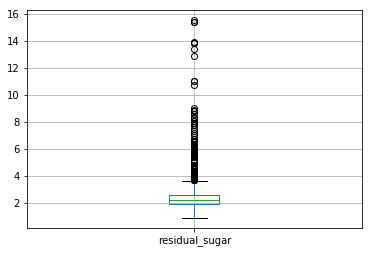

In [19]:
wine.boxplot(column='residual_sugar');

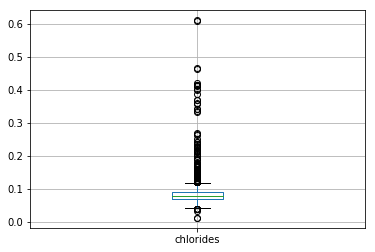

In [20]:
wine.boxplot(column='chlorides');

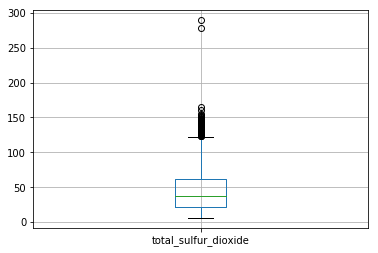

In [21]:
wine.boxplot(column='total_sulfur_dioxide');

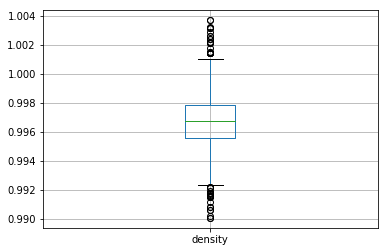

In [22]:
wine.boxplot(column='density');

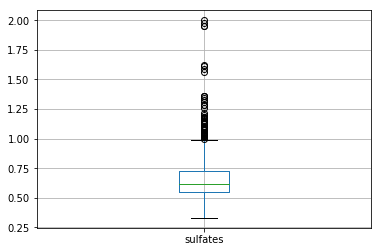

In [23]:
wine.boxplot(column='sulfates');

For all of these other than density, most of the outliers are very high in comparison to the median. Density is nearly normal, as seen in the histogram as well. Later we will explore the effect of these high levels on the quality of the wine. These outliers are likely due to the type of wine that was tested. Unfortunately the name of each wine was not provided.

### Conclusion
* There are no duplicate rows to remove
* None of the variables are missing values
* The majority of wines are rated at a 5 or 6 on a 0 to 10 scale
* There are outliers in most variables, specifically chlorides, sulfur/sulfates, and residual sugars.

In [56]:
wine.to_csv("data/wine.2.clean.csv", index=False)